In [106]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [107]:
dataset = pd.read_csv("NYC TLC Trip Record.csv")

C:\Users\anggi\AppData\Local\Temp\ipykernel_24772\1320163205.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv("NYC TLC Trip Record.csv")


In [108]:
dataset.head(5)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


In [109]:
dataset.tail(5)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN
68210,2,2023-01-31 23:51:00,2023-02-01 00:07:00,NaN,NaN,256,140,NaN,5.82,23.65,0.0,0.0,2.00,0.0,NaN,1.0,29.40,NaN,NaN,NaN


### Periksa nilai NaN

In [110]:
# periksa nilai kosong dari dataset
(dataset.isna().sum()/dataset.shape[0])*100

VendorID                   0.000000
lpep_pickup_datetime       0.000000
lpep_dropoff_datetime      0.000000
store_and_fwd_flag         6.339154
RatecodeID                 6.339154
PULocationID               0.000000
DOLocationID               0.000000
passenger_count            6.339154
trip_distance              0.000000
fare_amount                0.000000
extra                      0.000000
mta_tax                    0.000000
tip_amount                 0.000000
tolls_amount               0.000000
ehail_fee                100.000000
improvement_surcharge      0.000000
total_amount               0.000000
payment_type               6.339154
trip_type                  6.353814
congestion_surcharge       6.339154
dtype: float64

#### Kolom Ehail Fee

In [111]:
# penghapusan kolom ehail fee
dataset.drop(columns="ehail_fee", inplace=True)

#### Kolom Store and Fwd Flag

In [112]:
# mencari nilai unik dari kolom store and fwd flag
dataset["store_and_fwd_flag"].unique()

array(['N', 'Y', nan], dtype=object)

In [113]:
# mengisi nilai kosong dari kolom store and fwd flag dengan modus
dataset["store_and_fwd_flag"] = dataset["store_and_fwd_flag"].fillna(dataset["store_and_fwd_flag"].mode()[0])

#### Kolom RatecodeID

In [114]:
dataset[dataset["RatecodeID"]==99].head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
1084,1,2023-01-01 19:44:13,2023-01-01 19:58:30,N,99.0,150,55,1.0,3.3,18.2,0.0,1.5,0.0,0.0,1.0,19.7,1.0,NaN,0.0
2174,1,2023-01-02 16:39:05,2023-01-02 17:31:42,N,99.0,73,82,1.0,3.7,23.5,0.0,1.5,0.0,0.0,1.0,25.0,1.0,NaN,0.0
9055,1,2023-01-05 20:33:45,2023-01-05 22:46:41,N,99.0,14,123,1.0,6.2,28.2,0.0,1.5,0.0,0.0,1.0,29.7,1.0,NaN,0.0
14125,1,2023-01-08 11:36:41,2023-01-08 12:14:59,N,99.0,61,77,1.0,2.7,22.5,0.0,1.5,0.0,0.0,1.0,24.0,1.0,NaN,0.0
29143,1,2023-01-15 13:51:42,2023-01-15 14:37:38,N,99.0,108,181,1.0,6.5,24.2,0.0,1.5,0.0,0.0,1.0,25.7,1.0,NaN,0.0


In [115]:
dataset = dataset[dataset["RatecodeID"]!=99]

In [116]:
dataset["RatecodeID"] = dataset["RatecodeID"].fillna(dataset["RatecodeID"].mode()[0])

#### Kolom Passenger Count

In [117]:
dataset["passenger_count"].unique()

array([ 1.,  2.,  4.,  3.,  6.,  5.,  0.,  7.,  9.,  8., nan])

In [118]:
dataset = dataset[dataset["passenger_count"] != 0]

In [119]:
dataset["passenger_count"] = dataset["passenger_count"].fillna(dataset["passenger_count"].mode()[0])

#### Kolom Payment Type

In [120]:
dataset["payment_type"].unique()

array([ 1.,  2.,  3.,  4.,  5., nan])

In [121]:
dataset["payment_type"] = dataset["payment_type"].fillna(dataset["payment_type"].mode()[0])

#### Kolom Trip Type

In [122]:
dataset["trip_type"].unique()

array([ 1.,  2., nan])

In [123]:
dataset["trip_type"] = dataset["trip_type"].fillna(dataset["trip_type"].mode()[0])

#### Kolom Congestion Surcharge

In [124]:
dataset["congestion_surcharge"].unique()

array([ 2.75,  0.  ,  2.5 , -2.75,   nan])

In [125]:
dataset.loc[dataset["congestion_surcharge"]==-2.75, "congestion_surcharge"] = 2.75

In [126]:
dataset["congestion_surcharge"] = dataset["congestion_surcharge"].fillna(dataset["congestion_surcharge"].median())

### Periksa Tipe Data dari seluruh kolom

In [127]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67865 entries, 0 to 68210
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               67865 non-null  int64  
 1   lpep_pickup_datetime   67865 non-null  object 
 2   lpep_dropoff_datetime  67865 non-null  object 
 3   store_and_fwd_flag     67865 non-null  object 
 4   RatecodeID             67865 non-null  float64
 5   PULocationID           67865 non-null  int64  
 6   DOLocationID           67865 non-null  int64  
 7   passenger_count        67865 non-null  float64
 8   trip_distance          67865 non-null  float64
 9   fare_amount            67865 non-null  float64
 10  extra                  67865 non-null  float64
 11  mta_tax                67865 non-null  float64
 12  tip_amount             67865 non-null  float64
 13  tolls_amount           67865 non-null  float64
 14  improvement_surcharge  67865 non-null  float64
 15  total_a

#### Ubah format tanggal

In [128]:
from dateutil import parser
dataset["lpep_pickup_datetime"] = dataset["lpep_pickup_datetime"].apply(lambda x : parser.parse(x, dayfirst = True, fuzzy = True))

In [129]:
from dateutil import parser
dataset["lpep_dropoff_datetime"] = dataset["lpep_dropoff_datetime"].apply(lambda x : parser.parse(x, dayfirst = True, fuzzy = True))

#### Ubah Tipe Data Float jadi Int

In [130]:
dataset["RatecodeID"] = dataset["RatecodeID"].astype(int)

In [131]:
dataset["passenger_count"] = dataset["passenger_count"].astype(int)

In [132]:
dataset["payment_type"] = dataset["payment_type"].astype(int)

In [133]:
dataset["trip_type"] = dataset["trip_type"].astype(int)

### Periksa Nilai Alomani pada Setiap Kolom

#### Kolom Trip Distance

In [134]:
dataset[dataset["trip_distance"]<0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge


In [135]:
dataset[dataset["trip_distance"]==0].head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1,223,179,1,0.0,7.2,1.0,0.5,1.94,0.0,1.0,11.64,1,1,0.0
58,2,2023-01-01 00:57:15,2023-01-01 01:00:15,N,1,75,75,1,0.0,4.4,1.0,0.5,1.38,0.0,1.0,8.28,1,1,0.0
107,2,2023-01-01 01:11:13,2023-01-01 01:11:36,N,1,7,7,1,0.0,3.0,1.0,0.5,9.00,0.0,1.0,14.50,1,1,0.0
115,2,2023-01-01 01:52:58,2023-01-01 01:53:00,N,1,264,264,1,0.0,3.0,1.0,0.5,21.50,0.0,0.3,26.30,1,1,0.0
166,2,2023-01-01 02:37:12,2023-01-01 02:37:15,N,5,51,264,3,0.0,40.0,0.0,0.0,0.00,0.0,1.0,41.00,1,2,0.0


In [136]:
dataset = dataset[dataset["trip_distance"]!=0]

#### Kolom Fare Amount

In [137]:
dataset[dataset["fare_amount"]<0].head( )

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
662,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1,75,74,2,0.17,-3.0,0.0,-0.5,0.0,0.0,-1.0,-4.5,3,1,0.0
1317,2,2023-02-01 02:05:08,2023-02-01 02:12:57,N,1,129,82,1,0.64,-8.6,-1.0,-0.5,0.0,0.0,-1.0,-11.1,3,1,0.0
1686,2,2023-02-01 12:56:53,2023-02-01 13:00:10,N,1,75,75,1,0.77,-4.5,0.0,-0.5,0.0,0.0,-0.3,-5.3,4,1,0.0
1864,2,2023-02-01 13:51:33,2023-02-01 13:52:42,N,1,75,75,2,0.08,-3.7,0.0,-0.5,0.0,0.0,-1.0,-5.2,3,1,0.0
2481,2,2023-02-01 19:03:48,2023-02-01 19:04:24,N,1,130,130,1,0.11,-3.0,0.0,-0.5,0.0,0.0,-1.0,-4.5,3,1,0.0


In [138]:
dataset.loc[dataset["fare_amount"]<0, "fare_amount"] = dataset["fare_amount"] * (-1)

In [139]:
dataset = dataset[dataset["fare_amount"]!=0]

#### Kolom Extra

In [140]:
dataset[dataset["extra"] < 0].head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
1317,2,2023-02-01 02:05:08,2023-02-01 02:12:57,N,1,129,82,1,0.64,8.6,-1.0,-0.5,0.0,0.0,-1.0,-11.1,3,1,0.0
5980,2,2023-04-01 16:13:03,2023-04-01 16:15:30,N,1,95,95,5,0.22,4.4,-2.5,-0.5,0.0,0.0,-1.0,-8.4,3,1,0.0
6168,2,2023-04-01 17:38:20,2023-04-01 17:39:14,N,1,74,74,1,0.10,3.0,-2.5,-0.5,0.0,0.0,-1.0,-7.0,3,1,0.0
6329,2,2023-04-01 17:06:10,2023-04-01 17:11:35,N,1,42,74,1,0.75,7.2,-2.5,-0.5,0.0,0.0,-1.0,-11.2,3,1,0.0
6580,2,2023-04-01 19:17:34,2023-04-01 19:18:02,N,1,74,74,1,0.04,3.0,-2.5,-0.5,0.0,0.0,-1.0,-7.0,3,1,0.0


In [141]:
dataset.loc[dataset["extra"]<0, "extra"] = dataset["extra"] * (-1)

#### Kolom Mta Tax

In [142]:
dataset[dataset["mta_tax"]<0].head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
662,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1,75,74,2,0.17,3.0,0.0,-0.5,0.0,0.0,-1.0,-4.5,3,1,0.0
1317,2,2023-02-01 02:05:08,2023-02-01 02:12:57,N,1,129,82,1,0.64,8.6,1.0,-0.5,0.0,0.0,-1.0,-11.1,3,1,0.0
1686,2,2023-02-01 12:56:53,2023-02-01 13:00:10,N,1,75,75,1,0.77,4.5,0.0,-0.5,0.0,0.0,-0.3,-5.3,4,1,0.0
1864,2,2023-02-01 13:51:33,2023-02-01 13:52:42,N,1,75,75,2,0.08,3.7,0.0,-0.5,0.0,0.0,-1.0,-5.2,3,1,0.0
2481,2,2023-02-01 19:03:48,2023-02-01 19:04:24,N,1,130,130,1,0.11,3.0,0.0,-0.5,0.0,0.0,-1.0,-4.5,3,1,0.0


In [143]:
dataset.loc[dataset["mta_tax"]<0,"mta_tax"] = dataset["mta_tax"] * (-1)

#### Kolom Tip Amount

In [144]:
dataset[dataset["tip_amount"]<0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge


In [145]:
dataset.loc[dataset["tip_amount"]<0, "tip_amount"] = dataset["tip_amount"] * (-1)

#### Kolom Tolls Amount

In [146]:
dataset[dataset["tolls_amount"]<0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge


#### Kolom Improvement Surcharge

In [147]:
dataset[dataset["improvement_surcharge"]<0].head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
662,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1,75,74,2,0.17,3.0,0.0,0.5,0.0,0.0,-1.0,-4.5,3,1,0.0
1317,2,2023-02-01 02:05:08,2023-02-01 02:12:57,N,1,129,82,1,0.64,8.6,1.0,0.5,0.0,0.0,-1.0,-11.1,3,1,0.0
1686,2,2023-02-01 12:56:53,2023-02-01 13:00:10,N,1,75,75,1,0.77,4.5,0.0,0.5,0.0,0.0,-0.3,-5.3,4,1,0.0
1864,2,2023-02-01 13:51:33,2023-02-01 13:52:42,N,1,75,75,2,0.08,3.7,0.0,0.5,0.0,0.0,-1.0,-5.2,3,1,0.0
2481,2,2023-02-01 19:03:48,2023-02-01 19:04:24,N,1,130,130,1,0.11,3.0,0.0,0.5,0.0,0.0,-1.0,-4.5,3,1,0.0


In [148]:
dataset.loc[dataset["improvement_surcharge"]<0, "improvement_surcharge"] = dataset["improvement_surcharge"] * (-1)

#### Kolom Total Amount

In [149]:
dataset[dataset["total_amount"]<0].head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
662,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1,75,74,2,0.17,3.0,0.0,0.5,0.0,0.0,1.0,-4.5,3,1,0.0
1317,2,2023-02-01 02:05:08,2023-02-01 02:12:57,N,1,129,82,1,0.64,8.6,1.0,0.5,0.0,0.0,1.0,-11.1,3,1,0.0
1686,2,2023-02-01 12:56:53,2023-02-01 13:00:10,N,1,75,75,1,0.77,4.5,0.0,0.5,0.0,0.0,0.3,-5.3,4,1,0.0
1864,2,2023-02-01 13:51:33,2023-02-01 13:52:42,N,1,75,75,2,0.08,3.7,0.0,0.5,0.0,0.0,1.0,-5.2,3,1,0.0
2481,2,2023-02-01 19:03:48,2023-02-01 19:04:24,N,1,130,130,1,0.11,3.0,0.0,0.5,0.0,0.0,1.0,-4.5,3,1,0.0


In [150]:
dataset.loc[dataset["total_amount"]<0].head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
662,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1,75,74,2,0.17,3.0,0.0,0.5,0.0,0.0,1.0,-4.5,3,1,0.0
1317,2,2023-02-01 02:05:08,2023-02-01 02:12:57,N,1,129,82,1,0.64,8.6,1.0,0.5,0.0,0.0,1.0,-11.1,3,1,0.0
1686,2,2023-02-01 12:56:53,2023-02-01 13:00:10,N,1,75,75,1,0.77,4.5,0.0,0.5,0.0,0.0,0.3,-5.3,4,1,0.0
1864,2,2023-02-01 13:51:33,2023-02-01 13:52:42,N,1,75,75,2,0.08,3.7,0.0,0.5,0.0,0.0,1.0,-5.2,3,1,0.0
2481,2,2023-02-01 19:03:48,2023-02-01 19:04:24,N,1,130,130,1,0.11,3.0,0.0,0.5,0.0,0.0,1.0,-4.5,3,1,0.0


In [151]:
dataset.loc[dataset["total_amount"]<0, "total_amount"] = dataset["total_amount"] * (-1)

In [152]:
dataset["total_amount"] = dataset["fare_amount"] + dataset["extra"] + dataset["mta_tax"] + dataset["tip_amount"] + dataset["tolls_amount"] + dataset["improvement_surcharge"]

### Memeriksa Outliers dari Setiap Kolom yang Dicurigai

#### Kolom Trip Distance

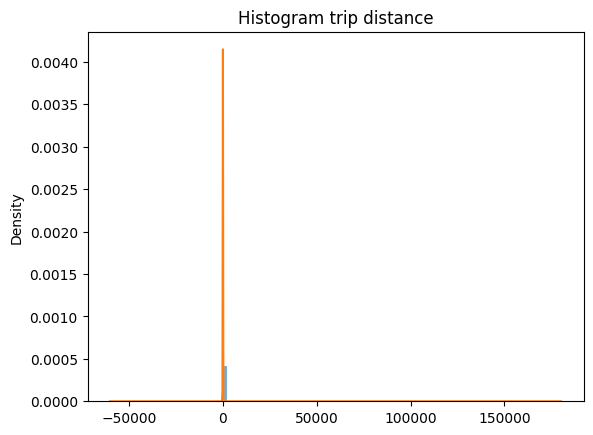

In [153]:
import matplotlib.pyplot as plt

dataset["trip_distance"].hist(bins=50, density=True, alpha=0.6)
dataset["trip_distance"].plot(kind="kde")  # kurva density
plt.title("Histogram trip distance")
plt.show()


In [154]:
df = dataset.copy()

In [155]:
Q1 = df["trip_distance"].quantile(0.25)
Q3 = df["trip_distance"].quantile(0.75)
IQR = Q3 - Q1
df = df[(df["trip_distance"] >= Q1 - 1.5*IQR) & (df["trip_distance"] <= Q3 + 1.5*IQR)]

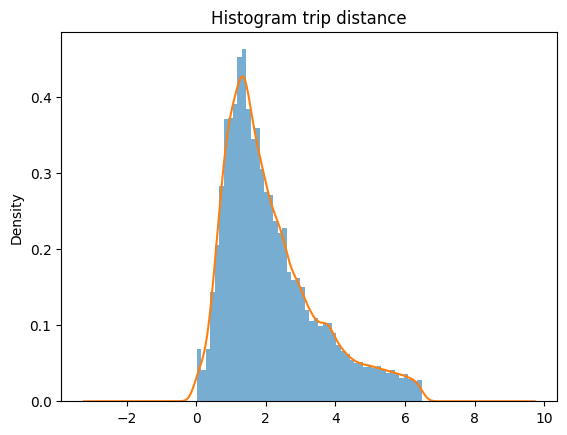

In [156]:
df["trip_distance"].hist(bins=50, density=True, alpha=0.6)
df["trip_distance"].plot(kind="kde")  # kurva density
plt.title("Histogram trip distance")
plt.show()

#### Kolom Fare Amount

Text(0.5, 1.0, 'Fare Amount')

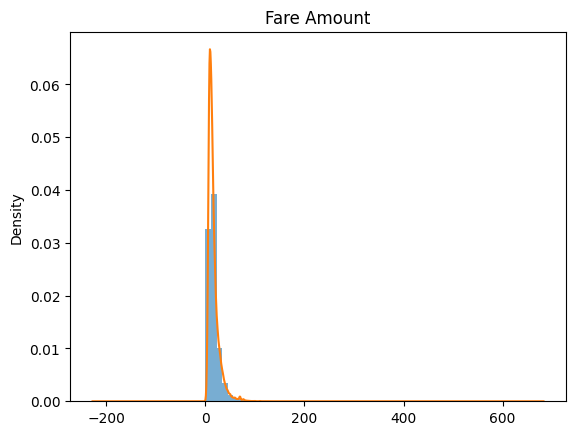

In [157]:
dataset["fare_amount"].hist(bins=40, density=True, alpha=0.6)
dataset["fare_amount"].plot(kind="kde")
plt.title("Fare Amount")

In [158]:
Q1 = df["fare_amount"].quantile(0.25)
Q3 = df["fare_amount"].quantile(0.75)
IQR = Q3 - Q1
df = df[(df["fare_amount"] >= Q1 - 1.5*IQR) & (df["fare_amount"] <= Q3 + 1.5*IQR)]

Text(0.5, 1.0, 'Fare Amount')

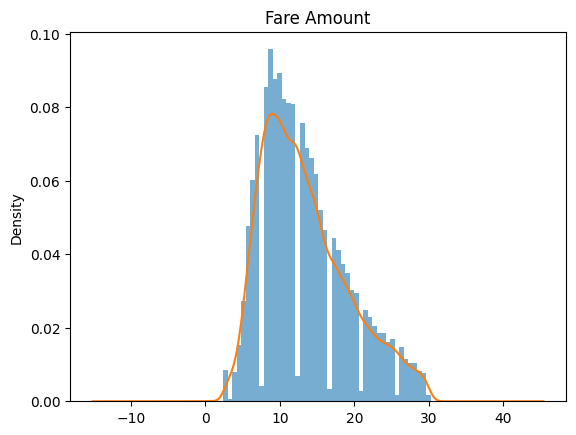

In [159]:
df["fare_amount"].hist(bins=50, density=True, alpha=0.6)
df["fare_amount"].plot(kind="kde")
plt.title("Fare Amount")

#### Kolom Total Amount

Text(0.5, 1.0, 'Total Amount')

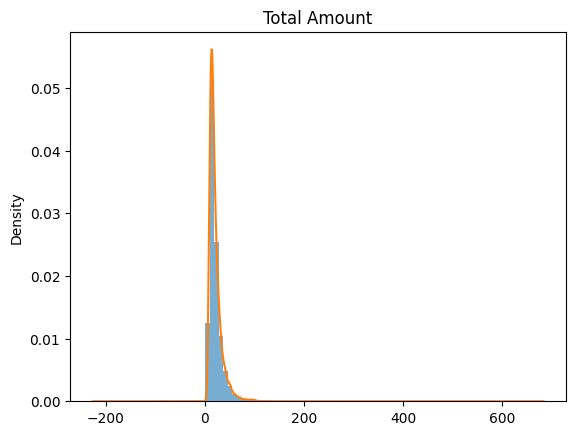

In [160]:
dataset["total_amount"].hist(alpha=0.6, density=True, bins=50)
dataset["total_amount"].plot(kind="kde")
plt.title("Total Amount")

In [161]:
Q1 = df["total_amount"].quantile(0.25)
Q3 = df["total_amount"].quantile(0.75)
IQR = Q3 - Q1
df = df[(df["total_amount"] >= Q1 - 1.5*IQR) & (df["total_amount"] <= Q3 + 1.5*IQR)]

Text(0.5, 1.0, 'Total Amount')

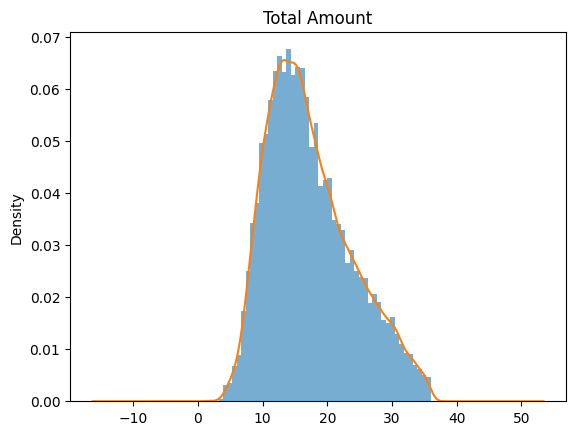

In [162]:
df["total_amount"].hist(bins=50, density=True, alpha=0.6)
df["total_amount"].plot(kind="kde")
plt.title("Total Amount")

### Uji Coba Analisis Data

##### 1. Menghitung peluang rata-rata dari 100 sampel memiliki total pendapatan lebih kecil dari 18

In [163]:
from scipy.stats import norm
import math

rata_rata = df["total_amount"].mean().round()
std = df["total_amount"].std().round()
n = 100
x = 18
z = (x-rata_rata)/(std/math.sqrt(n))

print(z)
print(norm.cdf(z))

1.4285714285714286
0.9234362744901652


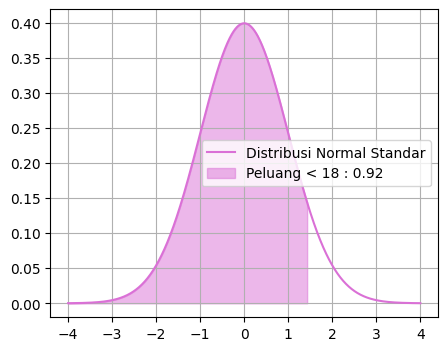

In [164]:
x = np.linspace(-4,4,1000)
y = norm.pdf(x)

plt.figure(figsize=(5,4))

plt.plot(x,y,label="Distribusi Normal Standar",color="orchid")
x_fill = np.linspace(-4,z,1000)
y_fill = norm.pdf(x_fill)

plt.fill_between(x_fill, y_fill, color="orchid", alpha = 0.5, label=f"Peluang < 18 : {norm.cdf(z):.2f}")
plt.legend()
plt.grid(True)
plt.show()

#### 2. Mengelompokkan data berdasarkan rata-rata

In [165]:
df["payment_type"].unique()

array([1, 2, 3, 4])

In [166]:
mapping_payment_type = {
    1 : "Credit card",
    2 : "Cash",
    3 : "No charge",
    4 : "Dispute"
}

df["payment_type2"] = df["payment_type"].map(mapping_payment_type)

In [167]:
dataframe_grouping = df.groupby("payment_type2").agg(median_total_amount=("total_amount","median"),max_total_amount=("total_amount","max"))
dataframe_grouping.reset_index(inplace=True)

In [168]:
dataframe_grouping

,payment_type2,median_total_amount,max_total_amount
0,Cash,13.6,35.95
1,Credit card,17.6,35.99
2,Dispute,6.9,26.10
3,No charge,7.7,32.05


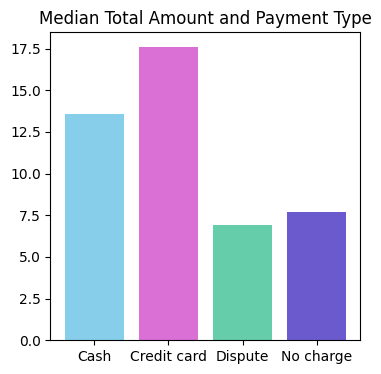

In [169]:
plt.figure(figsize=(4,4))
plt.bar(dataframe_grouping['payment_type2'], dataframe_grouping['median_total_amount'], color=["skyblue","orchid","mediumaquamarine","slateblue"])
plt.title('Median Total Amount and Payment Type')
plt.show()

#### 3. Membuat bins dan menggambar grafik bar plot

In [170]:
df["distance_type"] = pd.qcut(df["trip_distance"], q=3, labels=["Short distance", "Medium distance", "Long distance"])
df.head(5)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,payment_type2,distance_type
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1,166,143,1,2.58,14.9,1.0,0.5,4.03,0.0,1.0,21.43,1,1,2.75,Credit card,Long distance
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1,24,43,1,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1,1,0.00,Credit card,Medium distance
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1,41,238,1,1.30,6.5,0.5,1.5,1.70,0.0,1.0,11.20,1,1,0.00,Credit card,Short distance
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1,41,74,1,1.10,6.0,0.5,1.5,0.00,0.0,1.0,9.00,1,1,0.00,Credit card,Short distance
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1,41,262,1,2.78,17.7,1.0,0.5,0.00,0.0,1.0,20.20,2,1,2.75,Cash,Long distance


In [171]:
dataframe_grouping2 = df.groupby("distance_type").agg(passenger_max=("passenger_count","max"))
dataframe_grouping2.reset_index(inplace=True)
dataframe_grouping2

C:\Users\anggi\AppData\Local\Temp\ipykernel_24772\2374563046.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dataframe_grouping2 = df.groupby("distance_type").agg(passenger_max=("passenger_count","max"))


,distance_type,passenger_max
0,Short distance,8
1,Medium distance,6
2,Long distance,7


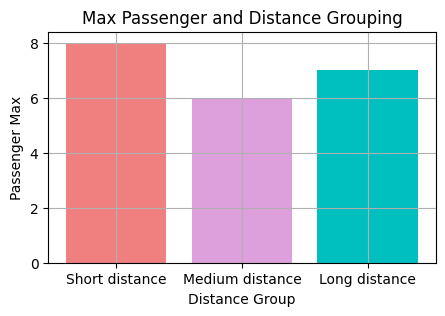

In [172]:
plt.figure(figsize=(5,3))
plt.bar(dataframe_grouping2["distance_type"], dataframe_grouping2["passenger_max"], color=['lightcoral','plum','c'])
plt.title('Max Passenger and Distance Grouping')
plt.xlabel('Distance Group')
plt.ylabel('Passenger Max')
plt.grid(True)
plt.show()

#### 4. Membuat grafik korelasi

<Axes: >

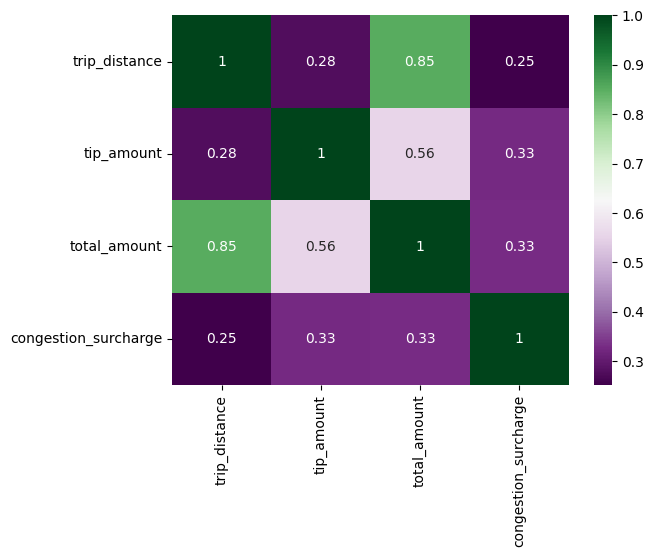

In [173]:
import seaborn as sns
sns.heatmap(df[["trip_distance","tip_amount","total_amount","congestion_surcharge"]].corr(), annot=True, cmap="PRGn")


#### 5. Membuat Kolom selisih jam dan Grafik Bar Plotnya

In [174]:
df3 = df.copy()
df3["selisih"] = df3["lpep_dropoff_datetime"] - df3["lpep_pickup_datetime"]
df3["selisih_jam"] = df3["selisih"].dt.total_seconds() / 3600
df3["selisih_jam"] = df3["selisih_jam"].astype(float)
df3 = df3[df3["selisih_jam"] > 0]

In [175]:
dataset_selisih_jam = df3.groupby("distance_type").agg(mean_selisih_jam=("selisih_jam","mean"))
dataset_selisih_jam.reset_index(inplace=True)
dataset_selisih_jam

C:\Users\anggi\AppData\Local\Temp\ipykernel_24772\2126448351.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dataset_selisih_jam = df3.groupby("distance_type").agg(mean_selisih_jam=("selisih_jam","mean"))


,distance_type,mean_selisih_jam
0,Short distance,1.421520
1,Medium distance,1.596715
2,Long distance,2.534656


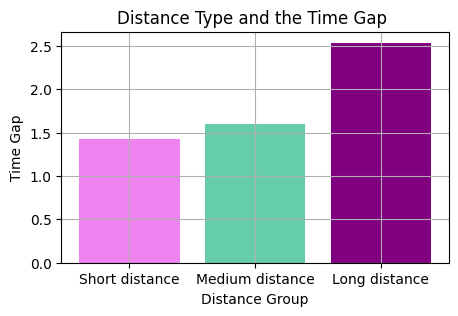

In [176]:
plt.figure(figsize=(5,3))
plt.bar(dataset_selisih_jam["distance_type"], dataset_selisih_jam["mean_selisih_jam"], color=['violet', 'mediumaquamarine', 'purple'])
plt.title('Distance Type and the Time Gap ')
plt.xlabel('Distance Group')
plt.ylabel('Time Gap')
plt.grid(True)
plt.show()

#### 6. Membuat Grafik Rata-rata tip yang diberikan penumpang berdasarkan bulan

In [177]:
df3["month"] = df["lpep_pickup_datetime"].dt.month
df3["month"].unique()

array([ 1,  9,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12])

In [178]:
dataset2 = df3.groupby("month").agg(median_tip=("tip_amount","median"))
dataset2.reset_index(inplace=True)
dataset2.head()

,month,median_tip
0,1,1.740
1,2,1.500
2,3,1.005
3,4,1.000
4,5,1.250


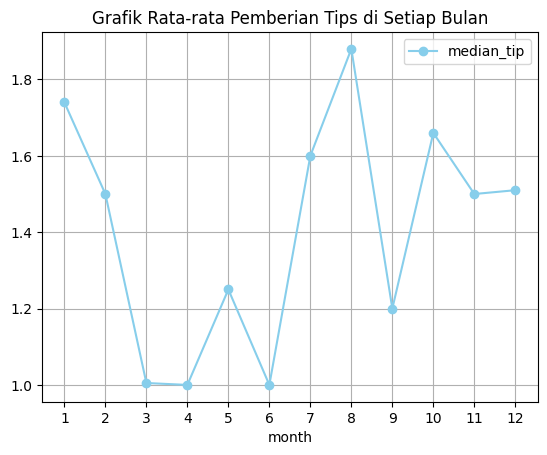

In [179]:
dataset2.plot(x="month", y="median_tip", kind="line", marker="o", title="Grafik Rata-rata Pemberian Tips di Setiap Bulan", color="skyblue")
plt.grid(True)

# tampilkan semua angka bulan di sumbu X
plt.xticks(dataset2["month"])
plt.show()


#### 7. Menghitung Confidence Interval 95% pada Rata-rata Trip Distance dengan t-distribution

Menghitung confidence interval

In [180]:
n = dataset.shape[0]
mean = dataset["trip_distance"].mean()
std = dataset["trip_distance"].std()
degree_of_freedom = n - 1

In [181]:
from scipy.stats import t
tc = t.ppf((97.5/100),degree_of_freedom)
tc

1.9600007452393369

In [182]:
from scipy.stats import t
tc2 = t.ppf((2.5/100), degree_of_freedom)
tc2

-1.9600007452393373

In [183]:
import math
E = (tc*std)/math.sqrt(n)
E

4.641095760864049

In [184]:
print(f"Maka rata-rata jarak trip dengan interval kepercayaan 95% adalah dari {mean-E:.2f} hingga {mean+E:.2f}")

Maka rata-rata jarak trip dengan interval kepercayaan 95% adalah dari 3.92 hingga 13.20


Menggambar grafik

In [185]:
x1 = norm.ppf(2.5/100)
x2 = norm.ppf(97.5/100)
print(x1)
print(x2)

-1.9599639845400545
1.959963984540054


In [186]:
x = np.linspace(-4,4,1000)
y = norm.pdf(x)

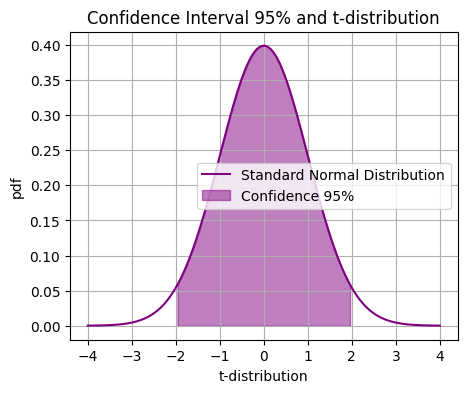

In [187]:
plt.figure(figsize=(5,4))
plt.plot(x,y,label="Standard Normal Distribution",color="purple")
x_fill = np.linspace(x1,x2,1000)
y_fill = norm.pdf(x_fill)
plt.fill_between(x_fill,y_fill,color="purple",alpha=0.5,label="Confidence 95%")
plt.title("Confidence Interval 95% and t-distribution")
plt.xlabel("t-distribution")
plt.ylabel("pdf")
plt.legend()
plt.grid(True)
plt.show()

#### 8. Membuat Kolom baru dengan mapping dari kolom yang sudah ada dan Grafiknya

In [188]:
print(df["trip_type"].unique())

mapping_trip_type = {
    1 : "Street-hail",
    2 : "Dispatch"
}

df["trip_type2"] = df["trip_type"].map(mapping_trip_type)

print(df["trip_type2"].unique())

[1 2]
['Street-hail' 'Dispatch']


In [189]:
df4 = df.groupby("trip_type2").agg(fare_amount_mean=("fare_amount","mean"))
df4.reset_index(inplace=True)
df4

,trip_type2,fare_amount_mean
0,Dispatch,16.543427
1,Street-hail,13.126656


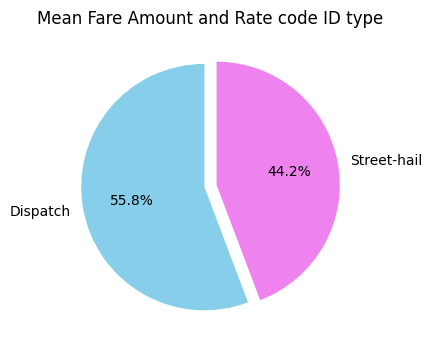

In [190]:
plt.figure(figsize=(4,4))
plt.pie(df4['fare_amount_mean'], labels=df4["trip_type2"], autopct='%1.1f%%', startangle=90, explode=[0.05]*len(df4["trip_type2"]), colors=["skyblue","violet"])
plt.title('Mean Fare Amount and Rate code ID type')
plt.show()

#### 9. Mapping Kolom Rate code ID dan Grafiknya

In [191]:
dataset["RatecodeID"].unique()

array([1, 5, 4, 3, 2])

In [192]:
mapping_RatecodeID = {
    1 : "Standard Rate",
    2 : "JFK",
    3 : "Newark",
    4 : "Nassau or Westchester",
    5 : "Negotiated Fare"
}

In [193]:
dataset["RatecodeID_type"] = dataset["RatecodeID"].map(mapping_RatecodeID)
dataset["RatecodeID_type"].unique()

array(['Standard Rate', 'Negotiated Fare', 'Nassau or Westchester',
       'Newark', 'JFK'], dtype=object)

In [194]:
df5 = dataset.groupby("RatecodeID_type").agg(mean_fare_amount=("fare_amount","mean"))
df5.reset_index(inplace=True)
df5

,RatecodeID_type,mean_fare_amount
0,JFK,69.727273
1,Nassau or Westchester,102.050943
2,Negotiated Fare,30.087098
3,Newark,82.800000
4,Standard Rate,16.053696


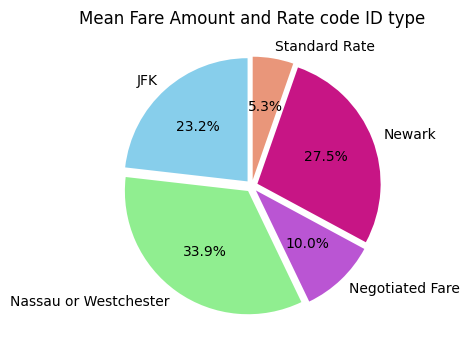

In [198]:
plt.figure(figsize=(4,4))
plt.pie(df5['mean_fare_amount'], labels=df5["RatecodeID_type"], autopct='%1.1f%%', startangle=90, explode=[0.05]*len(df5["RatecodeID_type"]), colors=["skyblue","lightgreen","mediumorchid","mediumvioletred","darksalmon"])
plt.title('Mean Fare Amount and Rate code ID type')
plt.show()

#### 10. Membuat Kolom Baru dan  Grafik dari kolom Count_Passenger

In [ ]:
df["VendorID"].unique()

array([2, 1], dtype=int64)

In [ ]:
mapping_vendorID = {
    2 : "VTS",
    1 : "CMT"
}

In [ ]:
df["VendorID2"] = df["VendorID"].map(mapping_vendorID)

In [ ]:
df6 = df.groupby("VendorID2").agg(tip_amount_max=("tip_amount", "max"), passenger_count_max=("passenger_count", "max"))
df6.reset_index(inplace=True)
df6

,VendorID2,tip_amount_max,passenger_count_max
0,CMT,15.0,6
1,VTS,20.0,8


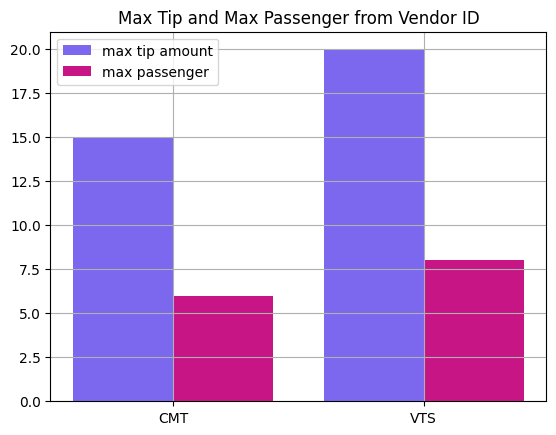

In [ ]:
width = 0.4
x = np.arange(len(df6["VendorID2"]))
kategori = df6["VendorID2"]

y1 = df6["tip_amount_max"]
y2 = df6["passenger_count_max"]
plt.bar(x - width/2, y1, width=width, label="max tip amount", color="mediumslateblue")
plt.bar(x + width/2, y2, width=width, label="max passenger", color="mediumvioletred")
plt.xticks(x, kategori)
plt.grid(True)
plt.title("Max Tip and Max Passenger from Vendor ID")
plt.legend()
plt.show()

#### 11. Membuat Grafik Top 5 Pick Up location

In [ ]:
dataset4 = df.groupby("PULocationID").agg(count=("passenger_count","count"))
df4 = dataset4.sort_values("count",ascending=False)
df5 = df4.head(5)
df5.reset_index(inplace=True)

In [ ]:
mapping_PULocationID = {
    41 : "Central Harlem",
    74 : "East Elmhurst",
    75 : "East Flatbush",
    95 : "Flatlands",
    166 : "Midtown Center"
}

df5["PULocationID2"] = df5["PULocationID"].map(mapping_PULocationID)

C:\Users\anggi\AppData\Local\Temp\ipykernel_24772\1503738501.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5["PULocationID2"] = df5["PULocationID"].map(mapping_PULocationID)


In [ ]:
df5

,PULocationID,count,PULocationID2
0,74,12363,East Elmhurst
1,75,8129,East Flatbush
2,41,3621,Central Harlem
3,166,3455,Midtown Center
4,95,3375,Flatlands


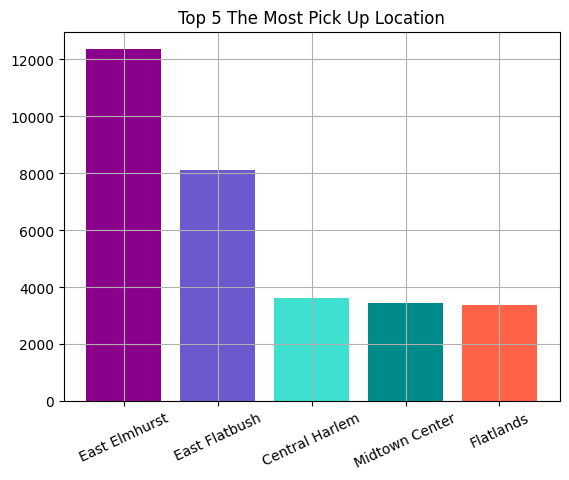

In [ ]:
plt.bar(df5["PULocationID2"], df5["count"],color=["darkmagenta","slateblue","turquoise","darkcyan","tomato"])
plt.title("Top 5 The Most Pick Up Location")
plt.xticks(rotation=25)  
plt.grid(True)
plt.show()